## Raster Data

In scikit-map, the class RasterData is responsible for implement reading, processing and writing operations. The library provides a NDVI toy dataset that you can access by:

In [8]:
import matplotlib.pyplot as plt
import sys
import numpy as np
import os
sys.path.insert(0, os.path.abspath('../../'))
from skmap.data import toy
rdata = toy.ndvi_rdata(gappy=True)

False
[14:20:29] RasterData with 24 rasters (band: 1) and 1 group(s)
[14:20:29] Reading 24 raster file(s) using 4 workers
[14:20:29] Read array shape: (256, 256, 24)


The data can be visualized through a static plot

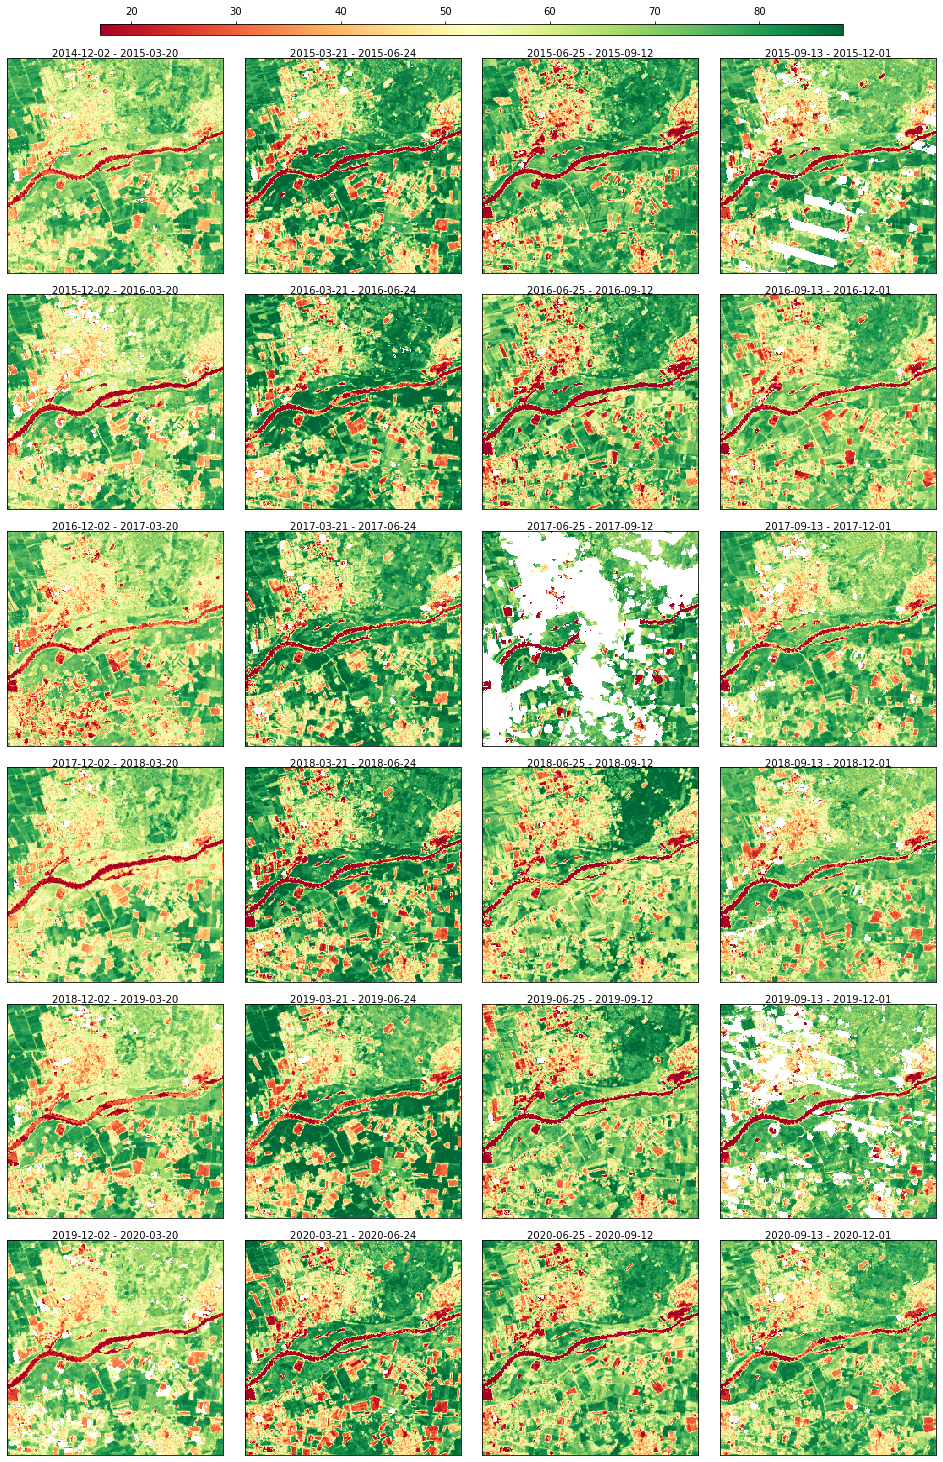

In [9]:
rdata.plot(cmap='RdYlGn', img_title_text='date')

Creating artificial gap at the begeinning of the time series to check that they do not get filled in case of no future images are used

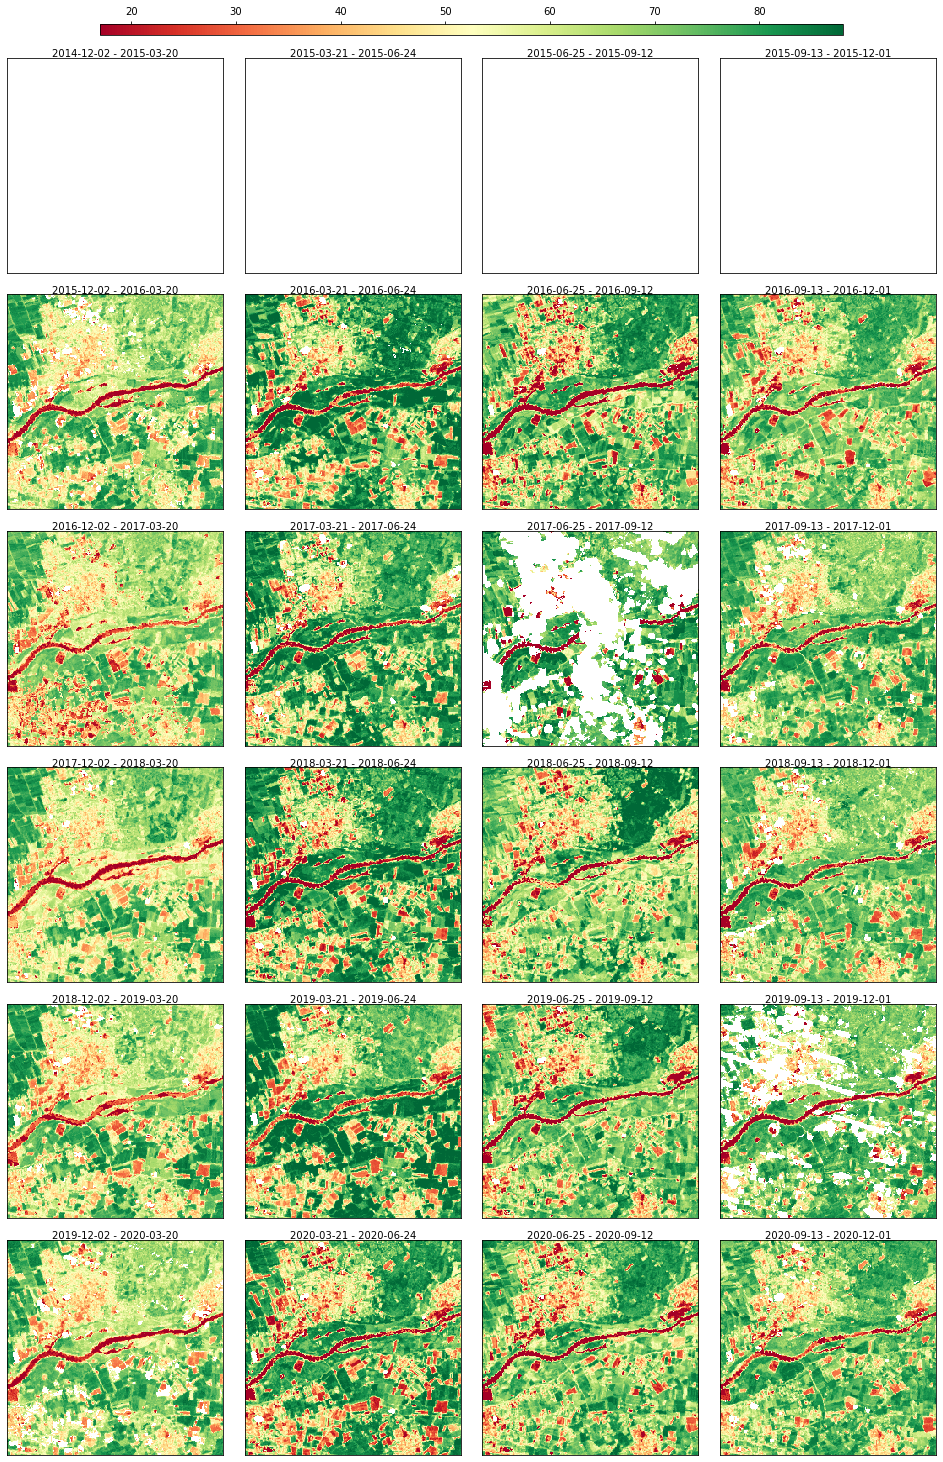

In [10]:
rdata.array[:,:,0:4] = np.nan
rdata.plot(cmap='RdYlGn', img_title_text='date')

Gap-filling with SeasConv using only images from the past

[14:20:42] Running SeasConvFill on (256, 256, 24) for ndvi group
[14:20:42] Dropping data and info for ndvi group
[14:20:42] Execution time for SeasConvFill: 0.39 segs


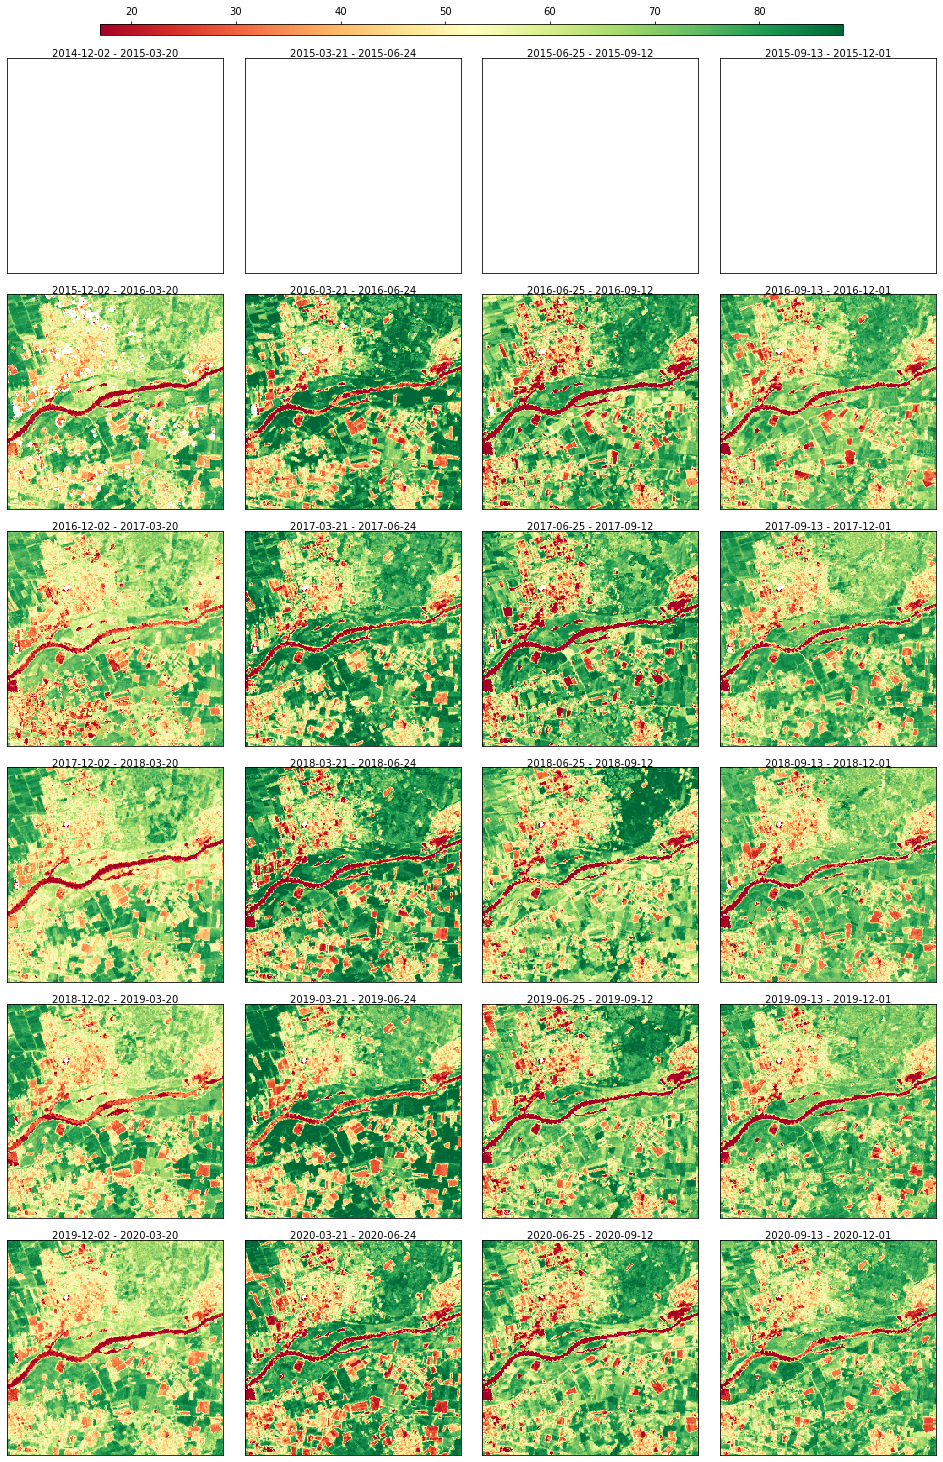

In [11]:
from skmap.io import process
import importlib
importlib.reload(process)
n_imag = rdata.array.shape[2]
seasconv = process.SeasConvFill(season_size=4)
half_conv_vect = seasconv._compute_conv_mat_row(n_imag)
conv_vect_past = half_conv_vect # default vector for the weights of the past
conv_vect_future = half_conv_vect * 0 # Setting to 0 the weights for future images (the first images should stay gap)
rdata = rdata.run(process.SeasConvFill(season_size=4, conv_vect_past = conv_vect_past, conv_vect_future = conv_vect_future), drop_input=True)
rdata.plot(cmap='RdYlGn', img_title_text='date')

Creating a vector to visualize the weights used from SeasConv

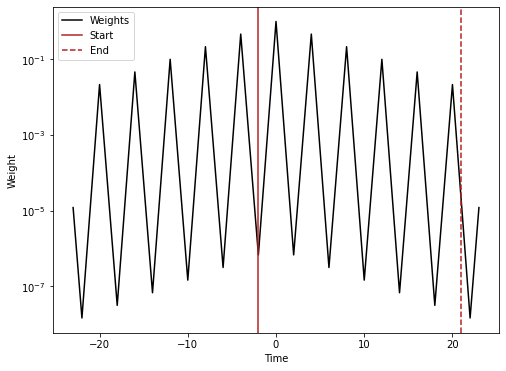

In [12]:
conv_vect_plot = np.concatenate((half_conv_vect[::-1][:-1], (1,), half_conv_vect[1:]))
plt.figure(figsize=(8,6))
t = (np.arange(n_imag*2-1)-n_imag+1)
ts = 2 # Index of the time series for the range to visualize
plt.semilogy(t, conv_vect_plot, 'k', label='Weights')
plt.axvline(x = t[n_imag-ts-1], color = 'firebrick', label = 'Start')
plt.axvline(x = t[2*n_imag-ts-2], linestyle='--', color = 'firebrick', label = 'End')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Weight')
plt.savefig('weights.png', dpi=600)
plt.show()

Same but with no future images

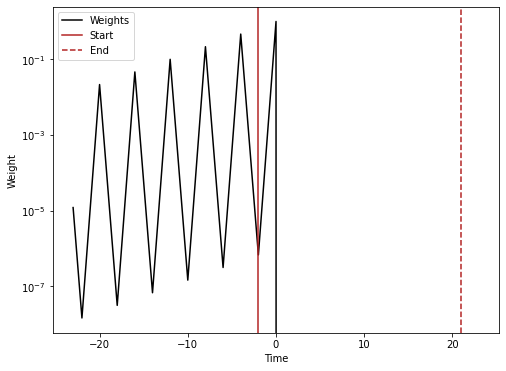

In [13]:
conv_vect_plot = np.concatenate((half_conv_vect[::-1][:-1], (1,), half_conv_vect[1:]*0))
plt.figure(figsize=(8,6))
t = (np.arange(n_imag*2-1)-n_imag+1)
ts = 2 # Index of the time series for the range to visualize
plt.semilogy(t, conv_vect_plot, 'k', label='Weights')
plt.axvline(x = t[n_imag-ts-1], color = 'firebrick', label = 'Start')
plt.axvline(x = t[2*n_imag-ts-2], linestyle='--', color = 'firebrick', label = 'End')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Weight')
plt.savefig('weights_no_future.png', dpi=600)
plt.show()